<a href="https://colab.research.google.com/github/m-agnet/Bachelor-of-Physics/blob/main/pressure_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 密度一定で, 粒子数が与える圧力への影響

---



## ファイル読み込み

In [196]:
# ライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [197]:
# ファイルのパスリスト

# paths内のファイルはboxに伴ってparticlesが異なり, densityは一定のファイル.
paths = [
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box2.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box4.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box8.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box12.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box18.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box27.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box36.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box48.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box64.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box80.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box100.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box125.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box150.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box180.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box216.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box252.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box294.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box343.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box392.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box448.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box512.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box576.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box648.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box729.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box810.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box900.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/3d_shorttime/press_box1000.txt',

    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box1331.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box1728.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box2197.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box2774.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box3375.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box4096.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box4913.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box5832.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box6859.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box8000.txt'
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box27000.txt',
    # '/content/drive/MyDrive/Colab Notebooks/data_analysis/box/press_box29791.txt'
]

# 変える物理量
quantity_changed_name = 'particles'

# # paths内のファイルはdensityが異なり, particlesは一定のファイル.
# paths = [
#     '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.0.txt',
#     '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.0.txt',
#     '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.0.txt'
# ]
# # 変える物理量
# quantity_changed_name = 'density'

# データのリスト
data_list = []

# データを読み込んでリストに追加
for path in paths:
    data = pd.read_table(path, sep='\s+')
    data_list.append(data)

# 分析をする対象の物理量
quantity_name = 'Press'

# 共通設定の入力
thermo = 2500
t_step = 0.005

# 変える物理量のデータリスト
quantity_changed = [ ]



## 初期データ, 緩和時間関連のデータ加工

In [198]:
# # 見る必要がないときはコメントアウト
# # データを出力する
# for i, data in enumerate(data_list):
#     print(f"Data {i+1}:")
#     print(data)
#     print()

#     # データをプロットする
#     data.plot(x='Time', y=quantity_name)
#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel(quantity_name, fontsize=12)
#     plt.title(f'Plot of {quantity_name} over Time (Data {i+1})', fontsize=14)
#     plt.grid()
#     plt.show()


In [199]:
# データ加工の設定
start = 0
end = 1000

# データを加工、出力、再格納、プロット
for i, data in enumerate(data_list):
    data = data.drop(range(start,end+1))
    data_list[i] = data  # 加工後のデータを再格納


In [200]:
# # 見る必要がないときはコメントアウト
# # データ出力
# for i, data in enumerate(data_list):
#     print(f"Data {i+1}:")
#     print(data)
#     # データをプロットする
#     data.plot(x='Time', y=quantity_name)
#     plt.xlabel('Time', fontsize=12)
#     plt.ylabel(quantity_name, fontsize=12)
#     plt.title(f'Plot of {quantity_name} over Time (Data {i+1})', fontsize=14)
#     plt.grid()
#     plt.show()


## 変える物理量によって, 表示する統計データを変更.

In [201]:
# 粒子数のリスト
particles = [ ]
if quantity_changed_name == 'particles':
    # 各データの粒子数
    box = [1, 2, 4, 8, 12, 18, 27, 36, 48, 64, 80, 100, 125, 150, 180, 216, 252, 294, 343, 392, 448, 512, 576, 648, 729, 810, 900, 1000]
    # , 1331, 1728, 2197, 2774, 3375, 4096, 4913, 5832, 6859, 8000]
    particles = [4*b for b in box]
    DENSITY = 0.01
    volume = [p / DENSITY for p in particles]
    quantity_changed = particles

# 密度のリスト
density = [ ]
if quantity_changed_name == 'density':
    # 各データの粒子数
    BOX = 512
    PARTICLES = 4*BOX
    density = [0.00015625, 0.00125, 0.01]
    volume = [PARTICLES / d for d in density]
    quantity_changed = density

## 確率密度関数

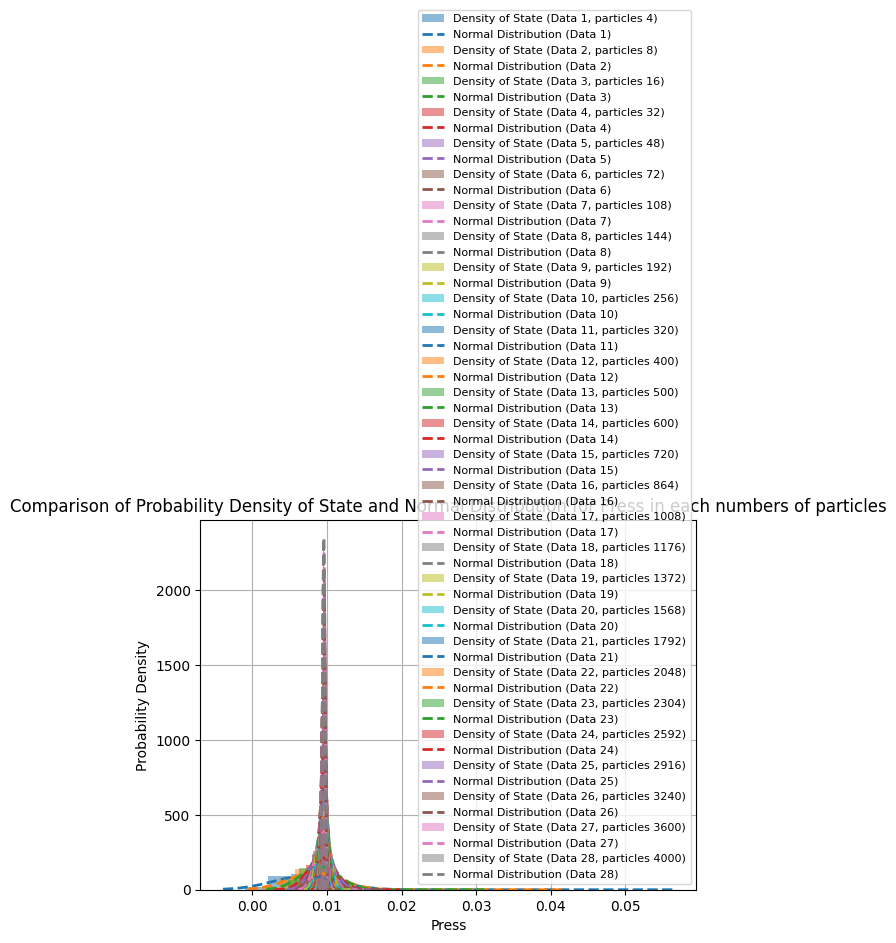

In [202]:
statistics_list = [] # 統計情報を保持するリスト
pdf_list = [] # 確立密度関数を保持するリスト
mean_list = []  # 各データの平均値を保持するリスト
std_list = []  # 各データの標準偏差を保持するリスト

# グラフを描画するためのフィギュアを作成
fig, ax = plt.subplots()

# カラーマップの設定
color_map = plt.get_cmap('tab10')

# データセット数繰り返し
for i, data in enumerate(data_list):

    # 対象物理量データリストをセット
    quantity = data[quantity_name]

    # 統計情報の計算
    mean = np.mean(quantity)
    median = np.median(quantity)
    std = np.std(quantity)
    minimum = np.min(quantity)
    maximum = np.max(quantity)
    q1, q3 = np.percentile(quantity, [25, 75])
    interquartile_range = q3 - q1

    # 確率密度関数の計算
    mu, sigma = mean, std
    x = np.linspace(minimum, maximum, 100)
    y = norm.pdf(x, mu, sigma)

    # 結果をリストに追加
    statistics = [mean, median, std, minimum, maximum, interquartile_range]
    statistics_list.append(statistics)
    pdf_list.append((x, y))
    mean_list.append(mean)
    std_list.append(std)

    # ヒストグラムの作成とプロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    label_normal = f'Normal Distribution (Data {i+1})'
    color = color_map(i % color_map.N)  # カラーマップから色を取得
    ax.hist(quantity, bins=20, density=True, alpha=0.5, color=color, label=label_density)
    ax.plot(x, y, '--', linewidth=2, color=color, label=label_normal)

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Probability Density')
ax.set_title(f'Comparison of Probability Density of State and Normal Distribution for {quantity_name} in each numbers of {quantity_changed_name}')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()


In [203]:
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# # カラーマップの設定
# color_map = plt.get_cmap('tab10')

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # ヒストグラムの作成とプロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    color = color_map(i % color_map.N)  # カラーマップから色を取得
    n, bins, patches = ax.hist(quantity, bins=20, density=True, alpha=0.5, color=color, label=label_density)

    # 中点の計算
    midpoints = (bins[1:] + bins[:-1]) / 2

    # 中点のプロット
    ax.plot(midpoints, n, '.-', color=color, label=f'Midpoints (Data {i+1})')

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Probability Density')
ax.set_title(f'Probability Density of State for {quantity_name} in each numbers of {quantity_changed_name}s')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()


In [204]:
# # ヒストグラムがらプロット
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # ヒストグラムの作成とプロット
#     label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
#     ax.hist(quantity, bins=20, density=True, alpha=0.5, label=label_density)

#     # ヒストグラムの中点を取得
#     hist, bins = np.histogram(quantity, bins=100)
#     midpoints = (bins[1:] + bins[:-1]) / 2

#     # ヒストグラムの中点を結ぶグラフをプロット
#     ax.plot(midpoints, hist, '.-', linewidth=2, markersize=5, label=f'Hist Line (Data {i+1})')

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Frequency')
# ax.set_title(f'Comparison of Histogram and Hist Line for {quantity_name} in each numbers of {quantity_changed_name}s')
# ax.legend(fontsize=8)
# ax.grid()

# # グラフを表示
# plt.show()


In [205]:
# import matplotlib.pyplot as plt
# import numpy as np

# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # ゼロや負の値を処理する
    quantity_processed = np.maximum(quantity, 1e-10)  # ゼロや負の値を1e-10に置き換える

    # ヒストグラムの中点を取得
    hist, bins = np.histogram(quantity_processed, bins=100)
    midpoints = (bins[1:] + bins[:-1]) / 2

    # ヒストグラムの中点を結ぶグラフをプロット
    ax.plot(midpoints, hist, '.-', linewidth=2, markersize=5, label=f'Hist Line (Data {i+1})')

# グラフを整形
ax.set_xlabel(f'{quantity_name}(log scale)')
ax.set_ylabel('Frequency(log scale)')
ax.set_title(f'Comparison of Histogram and Hist Line for {quantity_name} in each numbers of {quantity_changed_name}s(log scale)')
ax.legend(fontsize=8)
ax.grid()

# 軸を対数スケールに設定
ax.set_xscale('log')
ax.set_yscale('log')

# グラフを表示
plt.show()


In [206]:
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # ヒストグラムの作成
#     hist, bins = np.histogram(quantity, bins=100)

#     # ビンの中点を計算
#     bin_centers = (bins[1:] + bins[:-1]) / 2

#     # 確率密度を対数変換
#     log_hist = np.log10(hist)

#     # ヒストグラムの中点を結ぶグラフをプロット
#     label_hist = f'Hist Line (Data {i+1})'
#     ax.plot(bin_centers, log_hist, '.-', linewidth=2, markersize=5, label=label_hist)

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Log Frequency')
# ax.set_title(f'Comparison of Hist Line (log scale) for {quantity_name} in each numbers of {quantity_changed_name}s')
# ax.legend(fontsize=8)
# ax.grid()

# # グラフを表示
# plt.show()


In [207]:
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

# for i, data in enumerate(data_list):
#     # データ生成
#     quantity = data[quantity_name]

#     # ヒストグラムの作成
#     hist, bins = np.histogram(quantity, bins=100)

#     # ビンの中点を計算
#     bin_centers = (bins[1:] + bins[:-1]) / 2

#     # ヒストグラムの中点を結ぶグラフをプロット (縦軸を対数スケールに変更)
#     label_hist = f'Hist Line (Data {i+1})'
#     ax.semilogy(bin_centers, hist, '.-', linewidth=2, markersize=5, label=label_hist)

# # グラフを整形
# ax.set_xlabel(quantity_name)
# ax.set_ylabel('Frequency (log scale)')
# ax.set_title(f'Comparison of Hist Line (log scale) for {quantity_name} in each numbers of {quantity_changed_name}s')
# ax.legend(fontsize=8)
# ax.grid()

# # グラフを表示
# plt.show()


In [208]:
# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # ゼロや負の値を処理する
    quantity_processed = np.maximum(quantity, 1e-10)  # ゼロや負の値を1e-10に置き換える

    # 確率密度関数の計算
    mu, sigma = np.mean(np.log(quantity_processed)), np.std(np.log(quantity_processed))
    x = np.linspace(np.log(quantity_processed.min()), np.log(quantity_processed.max()), 100)
    y = norm.pdf(x, mu, sigma)

    # プロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    ax.plot(np.exp(x), np.exp(y), '--', linewidth=2, label=label_density)

# グラフを整形
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(quantity_name)
ax.set_ylabel('Density of State')
ax.set_title(f'Comparison of Density of State for {quantity_name} in each {quantity_changed_name}(log scale)')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()


In [209]:
# 生データでやる. 数値でーたの吟味のため, energyもあとでやる
# 統計情報と確率密度関数を保存するリスト
statistics_list = []
pdf_list = []
mean_list = []  # 各データの平均値を保持するリスト
std_list = []  # 各データの標準偏差を保持するリスト

# # グラフを描画するためのフィギュアを作成
# fig, ax = plt.subplots()

for i, data in enumerate(data_list):
    # データ生成
    quantity = data[quantity_name]

    # 統計情報の計算
    mean = np.mean(quantity)
    median = np.median(quantity)
    std = np.std(quantity)
    minimum = np.min(quantity)
    maximum = np.max(quantity)
    q1, q3 = np.percentile(quantity, [25, 75])
    interquartile_range = q3 - q1

    # 確率密度関数の計算
    mu, sigma = quantity.mean(), quantity.std()
    x = np.linspace(quantity.min(), quantity.max(), 100)
    y = norm.pdf(x, mu, sigma)
    log_y = np.log(y)  # 対数変換

    # 結果をリストに追加
    statistics = [mean, median, std, minimum, maximum, interquartile_range]
    statistics_list.append(statistics)
    pdf_list.append((x, log_y))  # 対数変換した確率密度関数を追加
    mean_list.append(mean)
    std_list.append(std)

    # プロット
    label_density = f'Density of State (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    label_normal = f'Normal Distribution (Data {i+1}, {quantity_changed_name} {quantity_changed[i]})'
    ax.plot(x, log_y, '--', linewidth=2, label=label_normal)

# グラフを整形
ax.set_xlabel(quantity_name)
ax.set_ylabel('Log Probability Density')  # 対数変換したのでラベルを変更
ax.set_title(f'Comparison of Normal Distribution (Log) for {quantity_name} in each {quantity_changed_name}')
ax.legend(fontsize=8)
ax.grid()

# グラフを表示
plt.show()

# # 統計情報の表示
# for i, statistics in enumerate(statistics_list):
#     print(f"Data {i+1}, {quantity_changed_name} {quantity_changed[i]}:")
#     print(f"Mean: {statistics[0]:.5f}")
#     print(f"Median: {statistics[1]:.5f}")
#     print(f"Standard deviation: {statistics[2]:.5f}")
#     print(f"Minimum value: {statistics[3]:.5f}")
#     print(f"Maximum value: {statistics[4]:.5f}")
#     print(f"Interquartile range: {statistics[5]:.5f}")
#     print()


## 示強性物理量の平均値

Mean values for each particles:
particles 4: 0.0071668
particles 8: 0.0083600
particles 16: 0.0090213
particles 32: 0.0092826
particles 48: 0.0094085
particles 72: 0.0094610
particles 108: 0.0094874
particles 144: 0.0095230
particles 192: 0.0095432
particles 256: 0.0095583
particles 320: 0.0095570
particles 400: 0.0095631
particles 500: 0.0095679
particles 600: 0.0095661
particles 720: 0.0095714
particles 864: 0.0095720
particles 1008: 0.0095738
particles 1176: 0.0095759
particles 1372: 0.0095764
particles 1568: 0.0095830
particles 1792: 0.0095815
particles 2048: 0.0095810
particles 2304: 0.0095792
particles 2592: 0.0095834
particles 2916: 0.0095815
particles 3240: 0.0095826
particles 3600: 0.0095807
particles 4000: 0.0095875


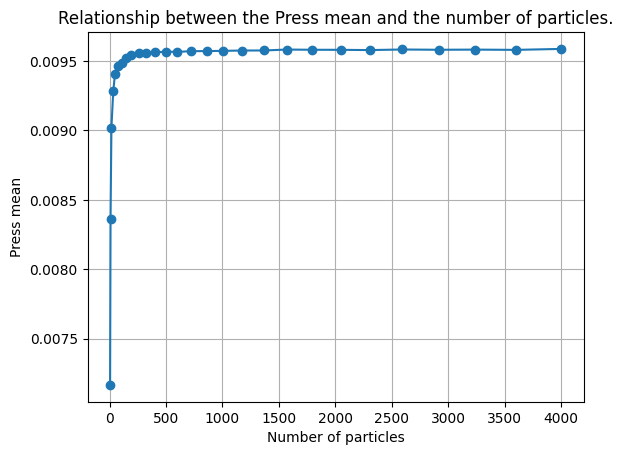

In [210]:
# 平均値について
print(f"Mean values for each {quantity_changed_name}:")
for i, mean_value in enumerate(mean_list):
    print(f"{quantity_changed_name} {quantity_changed[i]}: {mean_value:.7f}")

# plt.figure(figsize=(22, 11))  # 図のサイズを調整
plt.plot(quantity_changed, mean_list, 'o-')
plt.title(f'Relationship between the {quantity_name} mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} mean')
plt.grid()
plt.show()


In [211]:
# 横軸をスケーリングしたい
print(quantity_changed)
scaling_quantity_changed = [ ]
for i, quantity_changed_value in enumerate(quantity_changed):
    scaling_quantity_changed_value = 1 / np.sqrt(quantity_changed_value)
    scaling_quantity_changed.append(scaling_quantity_changed_value)
print(scaling_quantity_changed)

[4, 8, 16, 32, 48, 72, 108, 144, 192, 256, 320, 400, 500, 600, 720, 864, 1008, 1176, 1372, 1568, 1792, 2048, 2304, 2592, 2916, 3240, 3600, 4000]
[0.5, 0.35355339059327373, 0.25, 0.17677669529663687, 0.14433756729740646, 0.11785113019775793, 0.09622504486493763, 0.08333333333333333, 0.07216878364870323, 0.0625, 0.05590169943749474, 0.05, 0.044721359549995794, 0.040824829046386304, 0.037267799624996496, 0.034020690871988585, 0.0314970394174356, 0.029160592175990215, 0.02699746235780194, 0.025253813613805267, 0.0236227795630767, 0.022097086912079608, 0.020833333333333332, 0.019641855032959652, 0.018518518518518517, 0.017568209223157664, 0.016666666666666666, 0.015811388300841896]


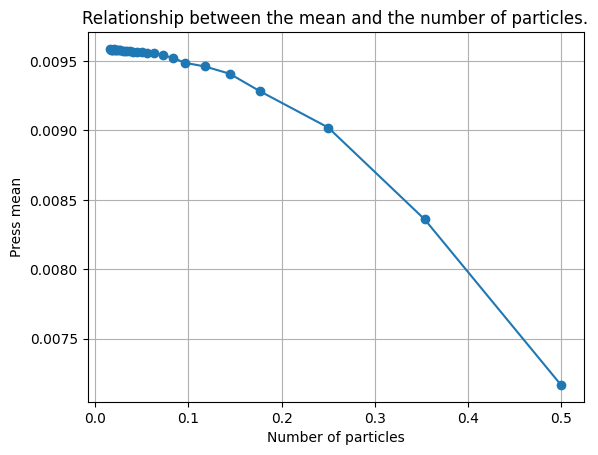

In [212]:
plt.plot(scaling_quantity_changed, mean_list, 'o-')
plt.title(f'Relationship between the mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} mean')
plt.grid()
plt.show()

In [213]:
# import numpy as np
# from matplotlib import pyplot as plt

# x= np.linspace(-10,10,20)
# #y= x**3 +  2*x**2 + 3*x + 10+ np.random.randn(20)*50
# #y= x**11 + x**9 + 1000*x**7 + 6*x**5 + 8*x**3 + x**1 + 10 #+ np.random.randn(20)*50
# y = 0.0001*x**10 +0.01*x**7 + 1000*x**3 + 10000*x #+ np.random.randn(20)*1000

# #近似式の係数
# res1=np.polynomial.Polynomial.fit(x, y, deg=1)
# res2=np.polynomial.Polynomial.fit(x, y, deg=2)
# res3=np.polynomial.Polynomial.fit(x, y, deg=3)
# res4=np.polynomial.Polynomial.fit(x, y, deg=4)
# res10=np.polynomial.Polynomial.fit(x, y, deg=10)

# print("10次近似式")
# print(res10)

# #近似式の計算
# y1 = res1(x)
# y2 = res2(x)
# y3 = res3(x)
# y4 = res4(x)
# y10 = res10(x)

# #グラフ表示
# plt.scatter(x, y, label='original')
# plt.plot(x, y1, label='1deg')
# plt.plot(x, y2, label='2deg')
# plt.plot(x, y3, label='3deg')
# plt.plot(x, y10, label='10deg')
# plt.legend()
# plt.show()

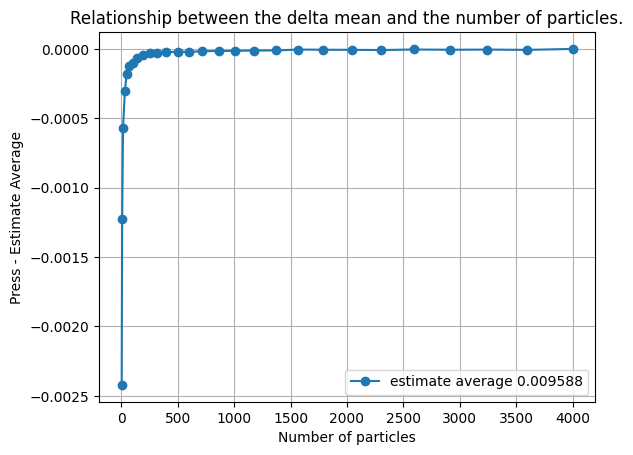

In [214]:
# estimate_ave を使って真の平均値の候補を単一に絞る
delta_mean = []
estimate_ave = 0.009588


# 真の平均値との差.
delta_mean = [m - estimate_ave for m in mean_list]


# データをプロット
plt.plot(quantity_changed, delta_mean, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the delta mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} - Estimate Average')
plt.legend()
plt.grid()
plt.show()

# print(delta_mean)

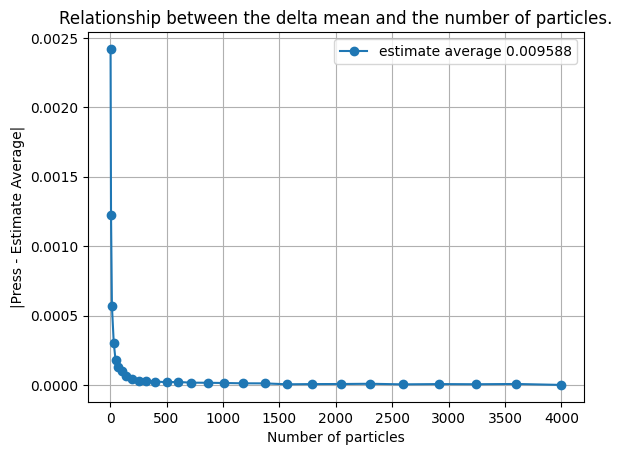

In [215]:
# y軸のデータを絶対値をとってプロット
abs_y_list = []
abs_y_list = [np.abs(d) for d in delta_mean]

# データをプロット
plt.plot(quantity_changed, abs_y_list, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the delta mean and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'|{quantity_name} - Estimate Average|')
plt.legend()
plt.grid()
plt.show()

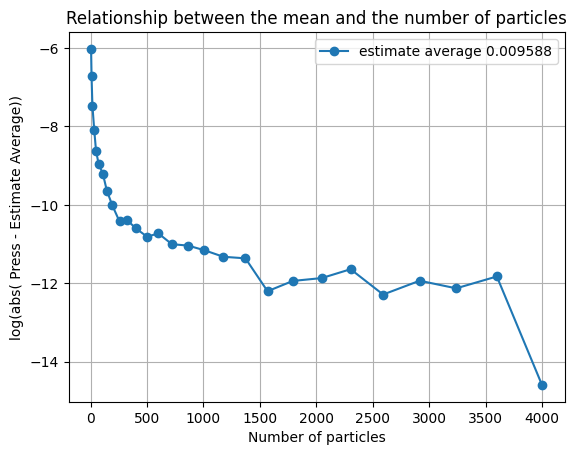

In [216]:
# 片対数プロット
log_y_list = []
log_y_list = [np.log(np.abs(d)) for d in delta_mean]

# データをプロット
plt.plot(quantity_changed, log_y_list, 'o-', label=f'estimate average {estimate_ave}')

plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
plt.legend()
plt.grid()
plt.show()


In [217]:
# # 両対数プロット
# log_x_list = []
# log_x_list = [np.log(q) for q in quantity_changed]

# # 線形フィット
# x = np.array(log_x_list)
# y = np.array(log_y_list)
# start_index = 0
# end_index = 16
# x_fit = x[start_index: end_index]
# y_fit = y[start_index: end_index]
# fit = np.polyfit(x_fit, y_fit, deg=1)
# predicted_y = fit[0] * x + fit[1]
# plt.plot(x, predicted_y, linestyle='--')


# # データをプロット
# plt.plot(log_x_list, log_y_list, 'o-', label=f'estimate average {estimate_ave}')
# plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
# plt.xlabel(f'log Number of {quantity_changed_name}')
# plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# plt.legend()
# plt.grid()
# plt.show()

# print(f'gradient={fit[0]}, intercept={fit[1]}')

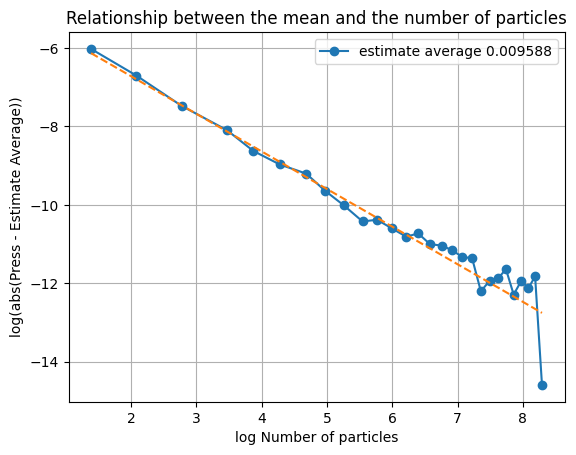

gradient=-0.9591368700766277, intercept=-4.802071379063206


In [218]:
# 両対数プロット
log_x_list = np.log(quantity_changed)  # quantity_changedの値の対数を計算し、log_x_listに格納

# 線形フィット
start_index = 0
end_index = 16
x_fit = log_x_list[start_index:end_index]  # 線形フィットに使用するx値の範囲を設定
y_fit = log_y_list[start_index:end_index]  # 線形フィットに使用するy値の範囲を設定
fit = np.polyfit(x_fit, y_fit, deg=1)  # x_fitとy_fitに対して1次の多項式フィットを行い、fitに係数を格納
predicted_y = fit[0] * log_x_list + fit[1]  # 予測されたy値を計算し、predicted_yに格納

# データをプロット
plt.plot(log_x_list, log_y_list, 'o-', label=f'estimate average {estimate_ave}')  # データ点をプロット
plt.plot(log_x_list, predicted_y, linestyle='--')  # 線形フィットの結果をプロット
plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')  # グラフのタイトルを設定
plt.xlabel(f'log Number of {quantity_changed_name}')  # x軸のラベルを設定
plt.ylabel(f'log(abs({quantity_name} - Estimate Average))')  # y軸のラベルを設定
plt.legend()  # 凡例を表示
plt.grid()  # グリッドを表示
plt.show()  # グラフを表示

print(f'gradient={fit[0]}, intercept={fit[1]}')  # フィットの傾きと切片を表示


In [219]:
# tau = 0.0
# if thermo < 10000:

#     # 指定のx軸の範囲にあるデータだけを使ってフィットする

#     xmin = 0  # 最小のx軸の値
#     xmax = 100  # 最大のx軸の値, データによって調整

#     mask = (x >= xmin) & (x <= xmax)
#     p = np.polyfit(x[mask], y_log[mask], 1)
#     y_fit = np.polyval(p, x[mask])

#     # フィット直線の傾きから緩和時間を計算する
#     tau = -1/p[0]
#     times = [1, 2, 3, 5]
#     y_vals = [np.interp(tau * t, x, y_log) for t in times]

#     # プロット
#     fig, ax = plt.subplots()
#     ax.plot(x, y_log, label='Data')
#     ax.plot(x[mask], y_fit, '--', label='Linear Fit')
#     for t, y in zip(times, y_vals):
#         ax.plot(tau*t, y, 'o', markersize=10, label=f'{t}*relaxation Time')
#     ax.set_xlabel('Time')
#     ax.set_ylabel(quantity_name)
#     ax.legend()


#     # zoomしたグラフの描画
#     axins = ax.inset_axes([0.6, 0.6, 0.37, 0.37])
#     axins.plot(x, y_log)
#     axins.plot(x[mask], y_fit, '--')
#     # zoomしたグラフの設定
#     x1, x2, y1, y2 = xmin-10, xmax+10, -4, 6
#     axins.set_xlim(x1, x2)
#     axins.set_ylim(y1, y2)
#     ax.indicate_inset_zoom(axins)

#     plt.grid()
#     plt.show()

#     # 結果の出力
#     for t, y in zip(times, y_vals):
#         print(f'{t}倍緩和時間 =', t*tau)


In [220]:
# # closer を使って真の平均値の候補を複数用いる
# delta_mean = []
# delta_mean_list = []
# closer = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9]

# # 真の平均値の出し方を変えたい. closerで近づける
# for c in closer:
#     delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
#     delta_mean_list.append(delta_mean)


# # データを重ねてプロット
# for idx, delta_mean in enumerate(delta_mean_list):
#     plt.plot(quantity_changed, delta_mean, 'o-', label=f'{closer[idx]}')


# plt.title(f'Relationship between the delta mean and the number of {quantity_changed_name}.')
# plt.xlabel(f'Number of {quantity_changed_name}')
# plt.ylabel(f'{quantity_name} - Estimate Average')
# plt.legend()
# plt.grid()
# plt.show()

# # print(delta_mean_list)

## 緩和粒子数を求める

In [221]:
# # 片対数プロット
# delta_mean_list = []


# # 真の平均値に近づけるための値
# for c in closer:
#     delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
#     delta_mean_list.append(delta_mean)

# residual_sums = []  # 残差平方和を保存するリスト

# for idx, delta_mean in enumerate(delta_mean_list):
#     # logをとる
#     x = np.array(quantity_changed)  # particlesをNumPy配列に変換
#     # x = np.log(particles)  # particlesをNumPy配列に変換
#     y = np.log(np.abs(delta_mean))
#     # fit = np.polyfit(x, y, deg=4)  # 1次の多項式による線形フィット
#     # predicted_y = fit[0] * x * x * x * x + fit[1] * x * x * x + fit[2] * x * x + fit[3] * x + fit[4] # 線形フィットによる予測値

#     # # 残差平方和の計算
#     # residuals = y - predicted_y
#     # residual_sum = np.sum(residuals**2)
#     # residual_sums.append(residual_sum)

#     # 対数変換のプロット
#     plt.plot(x, y, 'o-', label=f'Data {closer[idx]}')
#     # plt.plot(x, predicted_y, color='red', linestyle='--')  # 線形フィットのプロット
#     # print(f"Data {closer[idx]}: gradient={fit[0]}, intercept={fit[1]}")


#     # # 残差のプロット（任意）
#     # plt.plot(x, residuals, 'x-', label=f'Residuals {idx}')

# # グラフの設定と表示
# plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
# plt.xlabel(f'Number of {quantity_changed_name}')
# plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# plt.legend()
# plt.grid()
# plt.show()

# # # 残差平方和の表示
# # for idx, residual_sum in enumerate(residual_sums):
# #     print(f"Data {closer[idx]}: Residual Sum of Squares = {residual_sum}")


In [222]:
# # 両対数プロット
# delta_mean_list = []

# # 真の平均値に近づけるための値
# for c in closer:
#     delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
#     delta_mean_list.append(delta_mean)

# residual_sums = []  # 残差平方和を保存するリスト

# for idx, delta_mean in enumerate(delta_mean_list):
#     # logをとる
#     # x = np.array(particles)  # particlesをNumPy配列に変換
#     x = np.log(quantity_changed)  # particlesをNumPy配列に変換
#     y = np.log(np.abs(delta_mean))
#     fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット
#     predicted_y = fit[0] * x + fit[1]  # 線形フィットによる予測値

#     # 残差平方和の計算
#     residuals = y - predicted_y
#     residual_sum = np.sum(residuals**2)
#     residual_sums.append(residual_sum)

#     # 対数変換のプロット
#     plt.plot(x, y, 'o-', label=f'Data {closer[idx]}')
#     # plt.plot(x, predicted_y, color='red', linestyle='--')  # 線形フィットのプロット
#     print(f"Data {closer[idx]}: gradient={fit[0]}, intercept={fit[1]}")


#     # # 残差のプロット（任意）
#     # plt.plot(x, residuals, 'x-', label=f'Residuals {idx}')

# # グラフの設定と表示
# plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
# plt.xlabel(f'log Number of {quantity_changed_name}')
# plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# plt.legend()
# plt.grid()
# plt.show()

# # 残差平方和の表示
# for idx, residual_sum in enumerate(residual_sums):
#     print(f"Data {closer[idx]}: Residual Sum of Squares = {residual_sum}")


In [223]:
# delta_mean_list = []
# closer = [(1/4)*1e-8, (1/2)*1e-8, 1e-8]

# # 真の平均値に近づけるための値
# for c in closer:
#     delta_mean = [m - (mean_list[-1] + c) for m in mean_list]
#     delta_mean_list.append(delta_mean)

# residual_sums = []  # 残差平方和を保存するリスト

# for idx, delta_mean in enumerate(delta_mean_list):
#     # logをとる
#     x = np.array(quantity_changed)  # particlesをNumPy配列に変換
#     # x = np.log(particles)  # particlesをNumPy配列に変換
#     y = np.log(np.abs(delta_mean))
#     fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット
#     predicted_y = fit[0] * x + fit[1]  # 線形フィットによる予測値

#     # 残差平方和の計算
#     residuals = y - predicted_y
#     residual_sum = np.sum(residuals**2)
#     residual_sums.append(residual_sum)

#     # 対数変換のプロット
#     plt.plot(x, y, 'o-', label=f'Data {closer[idx]}')
#     plt.plot(x, predicted_y, color='red', linestyle='--')  # 線形フィットのプロット
#     print(f"Data {closer[idx]}: gradient={fit[0]}, intercept={fit[1]}")


#     # # 残差のプロット（任意）
#     # plt.plot(x, residuals, 'x-', label=f'Residuals {idx}')

# # グラフの設定と表示
# plt.title(f'Relationship between the mean and the number of {quantity_changed_name}')
# plt.xlabel(f'Number of {quantity_changed_name}')
# plt.ylabel(f'log(abs( {quantity_name} - Estimate Average))')
# plt.legend()
# plt.grid()
# plt.show()

# # 残差平方和の表示
# for idx, residual_sum in enumerate(residual_sums):
#     print(f"Data {closer[idx]}: Residual Sum of Squares = {residual_sum}")


## 示強性物理量の標準偏差

Stndard deviation for each data:
particles 4: 0.00438
particles 8: 0.00350
particles 16: 0.00259
particles 32: 0.00186
particles 48: 0.00152
particles 72: 0.00127
particles 108: 0.00102
particles 144: 0.00089
particles 192: 0.00077
particles 256: 0.00067
particles 320: 0.00059
particles 400: 0.00053
particles 500: 0.00048
particles 600: 0.00044
particles 720: 0.00039
particles 864: 0.00037
particles 1008: 0.00033
particles 1176: 0.00031
particles 1372: 0.00029
particles 1568: 0.00027
particles 1792: 0.00025
particles 2048: 0.00024
particles 2304: 0.00023
particles 2592: 0.00021
particles 2916: 0.00020
particles 3240: 0.00019
particles 3600: 0.00018
particles 4000: 0.00017


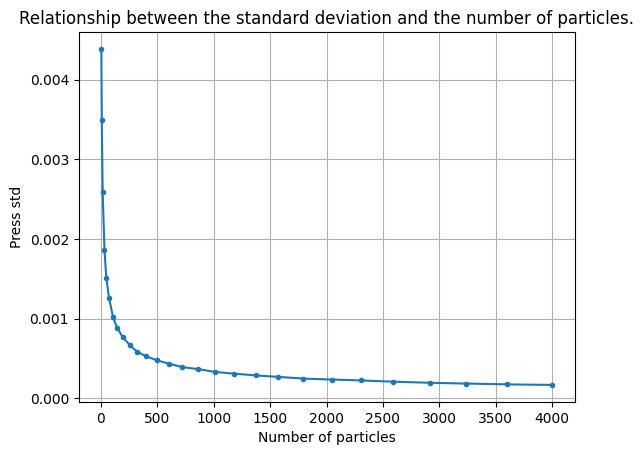

In [224]:
# 標準偏差について
print("Stndard deviation for each data:")
for i, std_value in enumerate(std_list):
    print(f"{quantity_changed_name} {quantity_changed[i]}: {std_value:.5f}")



plt.plot(quantity_changed, std_list, '.-')
plt.title(f'Relationship between the standard deviation and the number of {quantity_changed_name}.')
plt.xlabel(f'Number of {quantity_changed_name}')
plt.ylabel(f'{quantity_name} std')
plt.grid()
plt.show()


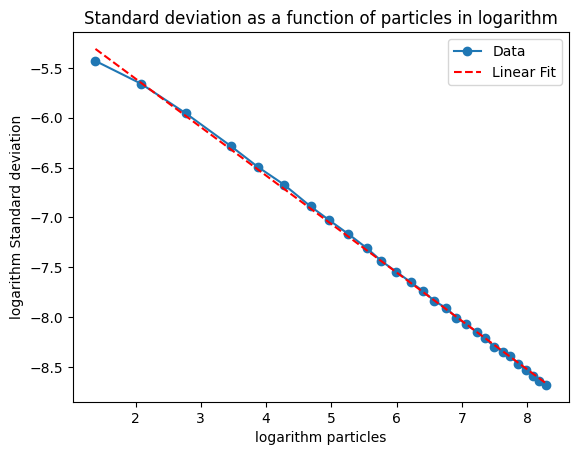

gradient=-0.4862602349154967


In [225]:
# 標準偏差プロットを対数とって傾きをみる.
# 対数変換
x = np.log(quantity_changed)
y = np.log(std_list)
fit = np.polyfit(x, y, deg=1)  # 1次の多項式による線形フィット

# プロット
plt.plot(x, y, 'o-')
plt.plot(x, fit[0] * x + fit[1], color='red', linestyle='--')  # 線形フィットのプロット
plt.xlabel(f'logarithm {quantity_changed_name}')
plt.ylabel(f'logarithm Standard deviation')
plt.title(f'Standard deviation as a function of {quantity_changed_name} in logarithm')
plt.legend(['Data', 'Linear Fit'])
plt.show()
print(f"gradient={fit[0]}")


# 状態方程式

## ファイル読み込み2

In [226]:
import pandas as pd
import matplotlib.pyplot as plt

# ファイルのパスリスト
paths = [
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.0.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00015625temp1.2.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.0.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.00125temp1.2.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.0.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.1.txt',
    '/content/drive/MyDrive/Colab Notebooks/data_analysis/press_density0.01temp1.2.txt'
]

# データのリスト
data_list = []

# データを読み込んでリストに追加
for path in paths:
    data = pd.read_table(path, sep='\s+')
    data_list.append(data)

# 密度と温度のデータ
quantity_changed_dict = {
    'density': [0.00015625, 0.00125, 0.01],
    'temp': [1.0, 1.1, 1.2]
}



Data 1 density 0.00015625 temp 1.0:
          Step   Time      Temp     TotEng     Press
0            0      0  1.000000  3070.5000  0.000156
1        10000     50  1.003002  3077.5918  0.000157
2        20000    100  1.024834  3145.6680  0.000160
3        30000    150  1.031134  3165.7207  0.000161
4        40000    200  1.021563  3136.7909  0.000160
...        ...    ...       ...        ...       ...
996    9960000  49800  1.007945  3093.4037  0.000157
997    9970000  49850  0.987360  3030.9625  0.000154
998    9980000  49900  0.981909  3013.2478  0.000153
999    9990000  49950  0.995168  3052.7581  0.000155
1000  10000000  50000  0.978772  3004.2920  0.000153

[1001 rows x 5 columns]



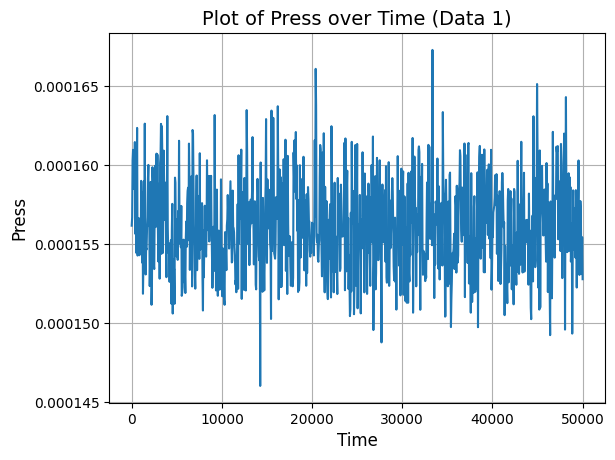

Data 2 density 0.00015625 temp 1.1:
          Step   Time      Temp     TotEng     Press
0            0      0  1.100000  3377.5500  0.000172
1        10000     50  1.090667  3347.5800  0.000170
2        20000    100  1.104775  3388.1550  0.000173
3        30000    150  1.107225  3398.9926  0.000173
4        40000    200  1.113969  3418.5106  0.000174
...        ...    ...       ...        ...       ...
996    9960000  49800  1.074423  3295.8768  0.000168
997    9970000  49850  1.104938  3390.2300  0.000172
998    9980000  49900  1.050215  3220.1925  0.000164
999    9990000  49950  1.098215  3371.2886  0.000171
1000  10000000  50000  1.113851  3418.8742  0.000174

[1001 rows x 5 columns]



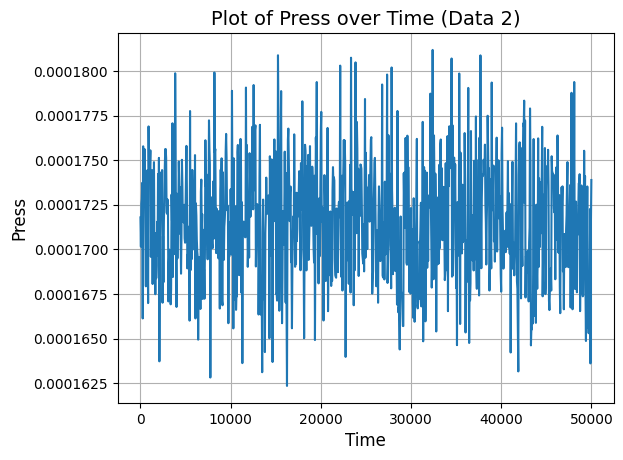

Data 3 density 0.00015625 temp 1.2:
          Step   Time      Temp     TotEng     Press
0            0      0  1.200000  3684.6000  0.000187
1        10000     50  1.186148  3640.4000  0.000185
2        20000    100  1.203913  3694.3944  0.000188
3        30000    150  1.194362  3665.2741  0.000187
4        40000    200  1.177693  3614.1946  0.000184
...        ...    ...       ...        ...       ...
996    9960000  49800  1.185232  3637.3012  0.000185
997    9970000  49850  1.174515  3605.3093  0.000183
998    9980000  49900  1.191856  3657.5318  0.000186
999    9990000  49950  1.194932  3667.1287  0.000186
1000  10000000  50000  1.194668  3666.6333  0.000187

[1001 rows x 5 columns]



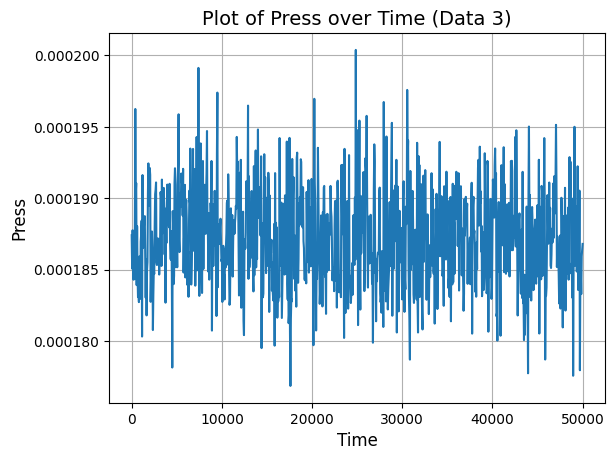

Data 4 density 0.00125 temp 1.0:
          Step   Time      Temp     TotEng     Press
0            0      0  1.000000  3070.5000  0.001249
1        10000     50  0.982885  2999.3611  0.001226
2        20000    100  0.998234  3048.5649  0.001232
3        30000    150  1.000554  3054.9515  0.001234
4        40000    200  0.989510  3019.2093  0.001226
...        ...    ...       ...        ...       ...
996    9960000  49800  0.987856  3011.1143  0.001238
997    9970000  49850  1.022579  3116.0756  0.001275
998    9980000  49900  1.007001  3071.4177  0.001247
999    9990000  49950  1.001339  3054.3500  0.001236
1000  10000000  50000  0.963885  2935.9887  0.001201

[1001 rows x 5 columns]



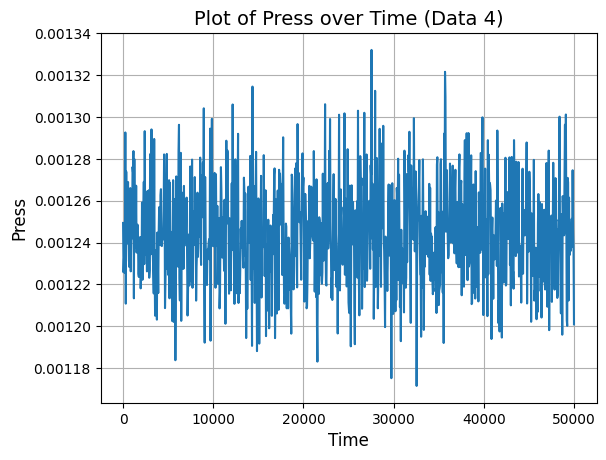

Data 5 density 0.00125 temp 1.1:
          Step   Time      Temp     TotEng     Press
0            0      0  1.100000  3377.5500  0.001374
1        10000     50  1.089079  3322.1746  0.001357
2        20000    100  1.097962  3352.4595  0.001362
3        30000    150  1.089661  3332.1045  0.001351
4        40000    200  1.096412  3347.7990  0.001367
...        ...    ...       ...        ...       ...
996    9960000  49800  1.114620  3395.5901  0.001381
997    9970000  49850  1.105328  3370.1528  0.001369
998    9980000  49900  1.071380  3272.3108  0.001339
999    9990000  49950  1.095145  3348.3062  0.001372
1000  10000000  50000  1.088428  3329.4765  0.001352

[1001 rows x 5 columns]



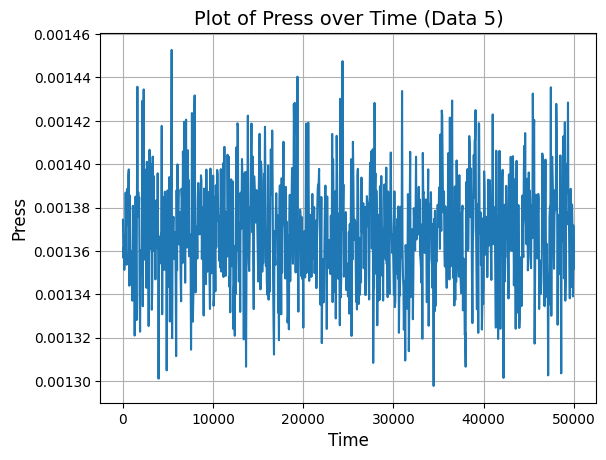

Data 6 density 0.00125 temp 1.2:
          Step   Time      Temp     TotEng     Press
0            0      0  1.200000  3684.6000  0.001499
1        10000     50  1.184167  3621.8688  0.001481
2        20000    100  1.163406  3555.1368  0.001449
3        30000    150  1.202986  3672.3462  0.001491
4        40000    200  1.233820  3772.9783  0.001534
...        ...    ...       ...        ...       ...
996    9960000  49800  1.223210  3735.5393  0.001513
997    9970000  49850  1.197114  3655.2578  0.001484
998    9980000  49900  1.213543  3705.5558  0.001508
999    9990000  49950  1.241442  3789.8766  0.001545
1000  10000000  50000  1.233548  3768.5725  0.001549

[1001 rows x 5 columns]



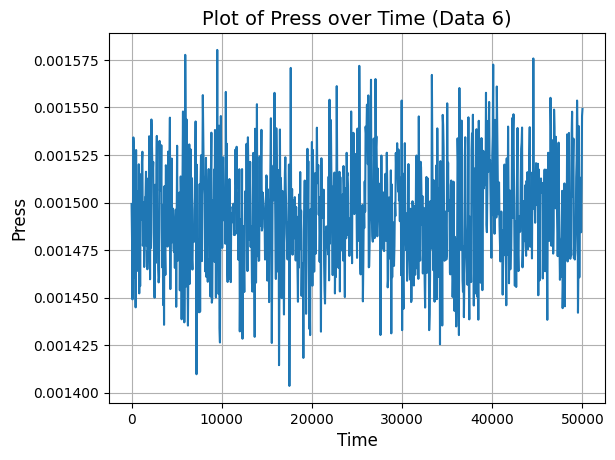

Data 7 density 0.01 temp 1.0:
            Step    Time      Temp     TotEng     Press
0              0       0  1.000000  3070.5000  0.009995
1          10000      50  0.997165  2877.2307  0.009392
2          20000     100  0.966174  2784.1192  0.009273
3          30000     150  1.000535  2896.8856  0.009702
4          40000     200  0.994752  2875.5796  0.009495
...          ...     ...       ...        ...       ...
9996    99960000  499800  0.994040  2869.7793  0.009508
9997    99970000  499850  0.979640  2856.8194  0.009474
9998    99980000  499900  1.031112  2979.5968  0.010153
9999    99990000  499950  1.043192  3020.9126  0.009988
10000  100000000  500000  0.995664  2866.1339  0.009363

[10001 rows x 5 columns]



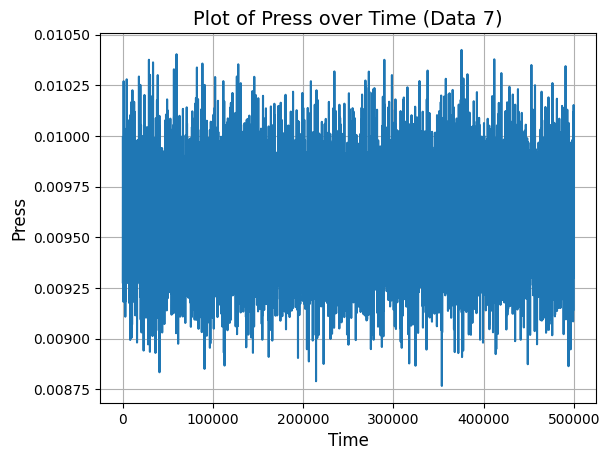

Data 8 density 0.01 temp 1.1:
          Step   Time      Temp     TotEng     Press
0            0      0  1.100000  3377.5500  0.010995
1        10000     50  1.129505  3300.4237  0.010718
2        20000    100  1.075504  3135.8058  0.010195
3        30000    150  1.105539  3216.0428  0.010505
4        40000    200  1.091238  3206.9588  0.010392
...        ...    ...       ...        ...       ...
996    9960000  49800  1.095478  3194.5756  0.010549
997    9970000  49850  1.072221  3136.6999  0.010386
998    9980000  49900  1.079998  3168.1694  0.010642
999    9990000  49950  1.106700  3241.7369  0.010769
1000  10000000  50000  1.130767  3308.1737  0.011083

[1001 rows x 5 columns]



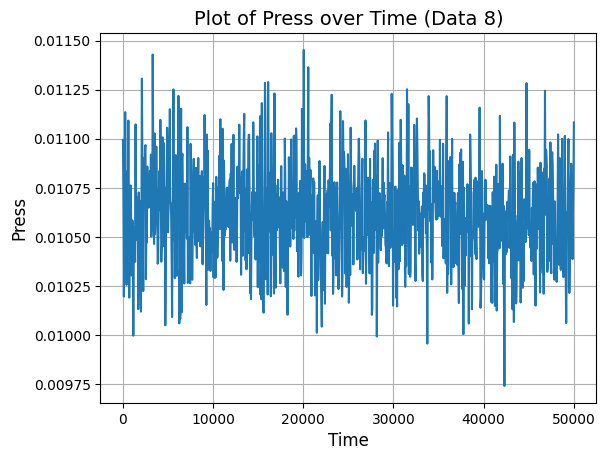

Data 9 density 0.01 temp 1.2:
          Step   Time      Temp     TotEng     Press
0            0      0  1.200000  3684.6000  0.011994
1        10000     50  1.238855  3650.3393  0.011780
2        20000    100  1.192990  3523.8559  0.011564
3        30000    150  1.199881  3525.7401  0.011596
4        40000    200  1.219059  3583.4762  0.011901
...        ...    ...       ...        ...       ...
996    9960000  49800  1.213477  3560.0911  0.011602
997    9970000  49850  1.267174  3722.6269  0.012345
998    9980000  49900  1.252831  3687.2004  0.012271
999    9990000  49950  1.218070  3582.0371  0.011718
1000  10000000  50000  1.190168  3506.5369  0.011407

[1001 rows x 5 columns]



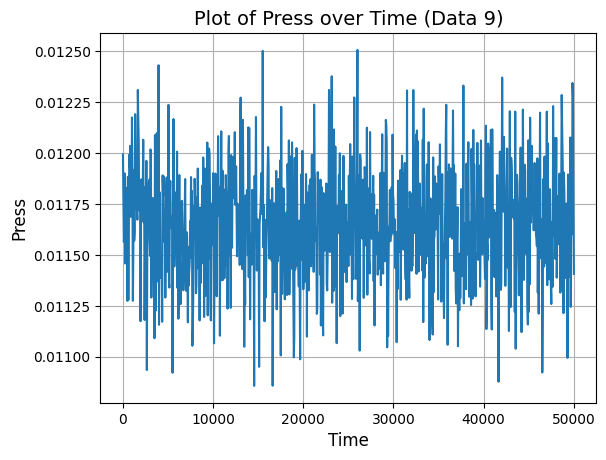

In [227]:
# 見る必要が無い場合はコメントアウト
# データを出力する
num = 0

for density in quantity_changed_dict['density']:
    for temp in quantity_changed_dict['temp']:
        data = data_list[num]

        print(f"Data {num+1} density {density} temp {temp}:")
        print(data)
        print()

        # データをプロットする
        plt.plot(data['Time'], data[quantity_name])
        plt.xlabel('Time', fontsize=12)
        plt.ylabel(quantity_name, fontsize=12)
        plt.title(f'Plot of {quantity_name} over Time (Data {num+1})', fontsize=14)
        plt.grid()
        plt.show()
        num += 1


In [228]:
num = 0
press_mean_list = [ ]

for density in quantity_changed_dict['density']:
    for temp in quantity_changed_dict['temp']:
        data = data_list[num]
        print(f"Data {num+1} density {density} temp {temp}:")
        avepress = np.mean(data['Press'])
        print(f'press = {avepress}')
        press_mean_list.append(avepress)
        num += 1


Data 1 density 0.00015625 temp 1.0:
press = 0.00015613191413586412
Data 2 density 0.00015625 temp 1.1:
press = 0.00017155517823176823
Data 3 density 0.00015625 temp 1.2:
press = 0.00018724897678321678
Data 4 density 0.00125 temp 1.0:
press = 0.001243876973726274
Data 5 density 0.00125 temp 1.1:
press = 0.0013688450466533466
Data 6 density 0.00125 temp 1.2:
press = 0.0014938255007992008
Data 7 density 0.01 temp 1.0:
press = 0.009585256954494551
Data 8 density 0.01 temp 1.1:
press = 0.010608941904295703
Data 9 density 0.01 temp 1.2:
press = 0.011647682303696304


In [229]:
num = 0
press_list_list = [ ]
temp_list_list = [ ]

for density in quantity_changed_dict['density']:
    press_y =[ ]
    temp_x = [ ]
    for temp in quantity_changed_dict['temp']:

        press_y.append(press_mean_list[num])
        temp_x.append(temp)
        num += 1

    press_list_list.append(press_y)
    temp_list_list.append(temp_x)

[[0.00015613191413586412, 0.00017155517823176823, 0.00018724897678321678], [0.001243876973726274, 0.0013688450466533466, 0.0014938255007992008], [0.009585256954494551, 0.010608941904295703, 0.011647682303696304]]
[[1.0, 1.1, 1.2], [1.0, 1.1, 1.2], [1.0, 1.1, 1.2]]


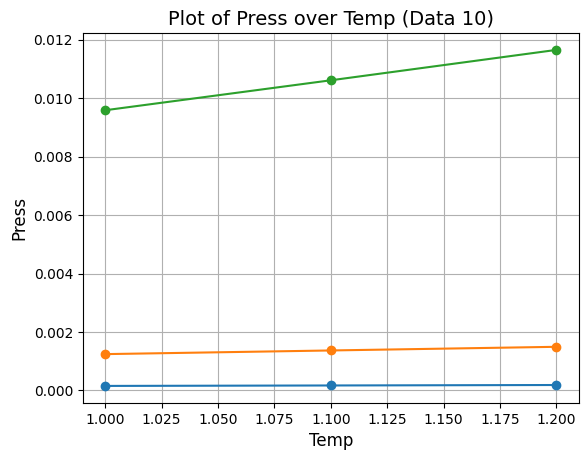

In [230]:
# プロット

print(press_list_list)
print(temp_list_list)

# データをプロットする
plt.plot(temp_list_list[0], press_list_list[0], 'o-')
plt.plot(temp_list_list[1], press_list_list[1], 'o-')
plt.plot(temp_list_list[2], press_list_list[2], 'o-')
plt.xlabel('Temp', fontsize=12)
plt.ylabel(quantity_name, fontsize=12)
plt.title(f'Plot of {quantity_name} over Temp (Data {num+1})', fontsize=14)
plt.grid()
plt.show()